In [1]:
from genetic_algorithm import algorithms, selectors, individuals, crossover
from deap import base, creator, tools
import numpy as np
import random

# Definir los parámetros del problema
IND_SIZE = 12  # Número de genes en cada individuo

# Crear los tipos de fitness e individuo en DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", individuals.truss_like, fitness=creator.FitnessMax)

# Configuración del entorno evolutivo utilizando DEAP
toolbox = base.Toolbox()

# Registro de las funciones
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", lambda: creator.Individual(np.array([[random.choice([0, 1]) for _ in range(IND_SIZE)] for _ in range(2)])))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", lambda ind: ind.evaluate())
toolbox.register("clone", lambda ind: ind.clone())
toolbox.register("mutate", lambda ind: ind.mutate())
toolbox.register("mate", crossover.mix_crossover)
toolbox.register("select", selectors.select_individuals_elitist)

n_pop = 50
pop = toolbox.population(n=n_pop)

hall_of_fame = tools.HallOfFame(1)

# Definir estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)


population, logbook = algorithms.ea(pop, toolbox, 100, halloffame= hall_of_fame, stats= stats)

pm:10.7: 100%|██████████| 100/100 [02:23<00:00,  1.43s/it]


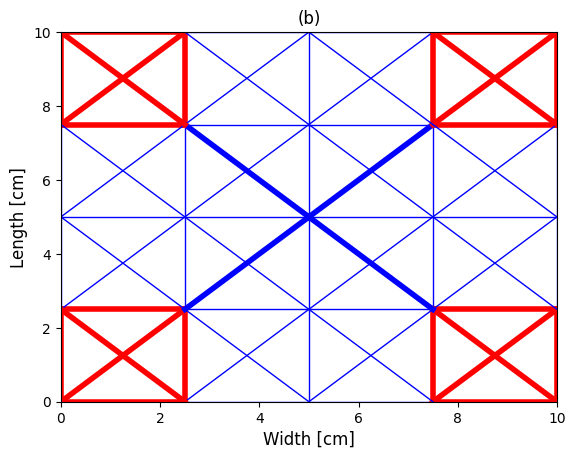

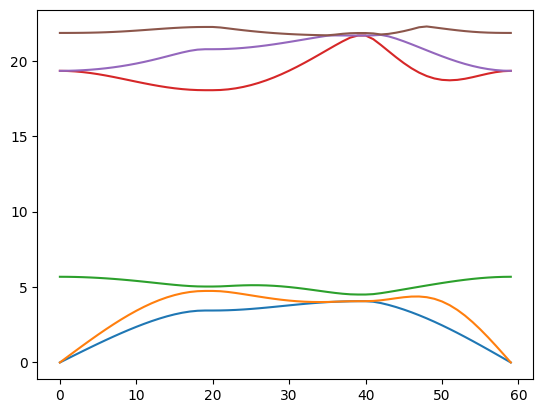

12.367997434639719


In [2]:
best_individual = hall_of_fame[0]
best_individual.plot()
print(best_individual.bandgap)

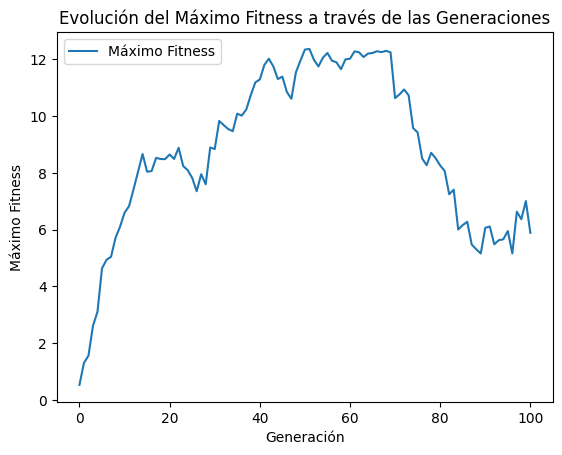

In [3]:
import matplotlib.pyplot as plt
gen, max = logbook.select("gen", "avg")

plt.plot(gen, max, label="Máximo Fitness")
plt.xlabel("Generación")
plt.ylabel("Máximo Fitness")
plt.title("Evolución del Máximo Fitness a través de las Generaciones")
plt.legend()
plt.show()

In [4]:
print(logbook)      

gen	nevals	pm  	avg     	std        	min      	max    
0  	50    	    	0.530151	0.900233   	0.01     	2.36206
1  	47    	5   	1.30557 	1.72558    	0.01     	5.49424
2  	45    	5.8 	1.56024 	1.0743     	0.01     	3.27382
3  	40    	5.8 	2.60993 	0.901311   	0.0196362	4.50163
4  	41    	5.8 	3.10758 	1.10633    	0.842148 	5.10998
5  	39    	5.6 	4.63611 	1.19424    	1.84554  	6.44868
6  	41    	5.8 	4.93805 	1.33215    	0.883588 	6.44868
7  	38    	6.2 	5.04367 	1.32735    	1.4555   	6.07927
8  	39    	6   	5.71119 	0.920872   	3.38758  	6.88251
9  	42    	6   	6.10323 	0.774671   	4.45203  	6.88251
10 	42    	6   	6.59699 	1.2792     	3.94127  	8.45352
11 	35    	5.8 	6.82894 	1.41919    	3.12909  	8.45352
12 	40    	6   	7.42394 	1.01794    	5.01647  	8.69717
13 	39    	6.1 	8.04385 	0.957653   	5.04528  	9.02629
14 	36    	6   	8.66406 	1.40945    	5.51362  	11.7703
15 	37    	6.1 	8.04259 	1.51987    	3.98765  	11.7703
16 	43    	6   	8.06409 	1.07235    	5.13231  	9.12939
17 	36    